# Part 2

## やること

1. State the different modeling approaches that you will compare to address the business opportunity.（ビジネスチャンスに対処するために比較するさまざまなモデリングアプローチを説明します。）
2. Iterate on your suite of possible models by modifying data transformations, pipeline architectures, hyperparameters and other relevant factors.（データ変換、パイプラインアーキテクチャ、ハイパーパラメータ、およびその他の関連する要素を変更することにより、可能なモデルのスイートを反復処理します。）
3. Re-train your model on all of the data using the selected approach and prepare it for deployment.（選択したアプローチを使用して、すべてのデータでモデルを再トレーニングし、展開の準備をします。）
4. Articulate your findings in a summary report.（要約レポートで調査結果を明確にします。）

## Our Story

The business opportunity has been defined and you have come to an agreement with leadership with respect to appropriate wording and testable hypotheses. This part of the case study will focus on the next two stages in the enterprise workflow, namely data transformations and models. This part of the workflow will be treated slightly differently than previous case studies as these are time-series data, but the general procedure and best practices remain the same. These materials will provide the necessary guidance so that you can apply one of the supervised learning approaches that we have already discussed. However, you will also be encouraged to explore some of the time-series modeling tools available.

### 和訳

ビジネスチャンスが定義され、適切な表現と検証可能な仮説に関してリーダーシップと合意に達しました。 ケーススタディのこの部分では、エンタープライズワークフローの次の2つの段階、つまりデータ変換とモデルに焦点を当てます。 ワークフローのこの部分は、時系列データであるため、以前のケーススタディとは少し異なる方法で処理されますが、一般的な手順とベストプラクティスは同じままです。 これらの資料は、すでに説明した教師あり学習アプローチの1つを適用できるように、必要なガイダンスを提供します。 ただし、利用可能な時系列モデリングツールのいくつかを調べることもお勧めします。

## Hands On 説明

Time-series data are commonly encountered in data science. In particular, the field of finance, signal processing, weather and other fields regularly deal with data formatted in this way. The goal of this case study is time-series forecasting, which can be thought of as the use of a model to predict future values based on previously observed values. So we could try to predict purchases, number of views or the feature most closely related to our business opportunity, revenue.

### 和訳

時系列データは、データサイエンスでよく見られます。 特に、金融、信号処理、気象などの分野では、このようにフォーマットされたデータを定期的に扱っています。 このケーススタディの目標は時系列予測です。これは、以前に観測された値に基づいて将来の値を予測するためのモデルの使用と考えることができます。 そのため、購入、視聴回数、またはビジネスチャンス、収益に最も密接に関連する機能を予測することができます。

## import packages

In [1]:
import sys
sys.path.append("../solution-guidance/")
import cslib
# import model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## parameter settings

In [3]:
path_data = "../data/"
path_data_production = path_data + "cs-production/"
path_data_train = path_data + "cs-train/"

In [4]:
# 予測の対象とする国. 今回はuk
name_target_country = "united_kingdom"

## 問題と回答 

### 1.State the different modeling approaches that you will compare to address the business opportunity.（ビジネスチャンスに対処するために比較するさまざまなモデリングアプローチを説明します。）

#### 回答

- 時系列回帰
- ランダムフォレスト, 勾配ぶースティング
- ガウス過程
- 状態空間モデル

### 2.Iterate on your suite of possible models by modifying data transformations, pipeline architectures, hyperparameters and other relevant factors.（データ変換、パイプラインアーキテクチャ、ハイパーパラメータ、およびその他の関連する要素を変更することにより、可能なモデルのスイートを反復処理します。）

#### データ変換

In [5]:
# 時系列にしたDataFrameを国ごとの辞書にする
dct_df_train = cslib.fetch_ts(path_data_train)

... loading ts data from files


In [33]:
# 対象の国のみのデータを抽出
# 対象の日付は 2017/11/1 ~ 2019/6/30
df_train = dct_df_train[name_target_country]

In [34]:
# 特徴量の作成
# 対象の日付は 2017/11/29 ~ 2019/5/31 （計549日）となる
df_features, y, dates = cslib.engineer_features(df_train)

In [35]:
df_train

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-01,0,0,0,0,2017-11,0.00
1,2017-11-02,0,0,0,0,2017-11,0.00
2,2017-11-03,0,0,0,0,2017-11,0.00
3,2017-11-04,0,0,0,0,2017-11,0.00
4,2017-11-05,0,0,0,0,2017-11,0.00
...,...,...,...,...,...,...,...
602,2019-06-26,1274,62,965,5702,2019-06,4611.00
603,2019-06-27,1487,72,897,8230,2019-06,5128.02
604,2019-06-28,923,62,565,4674,2019-06,3096.20
605,2019-06-29,0,0,0,0,2019-06,0.00


In [36]:
df_features

,previous_7,previous_14,previous_28,previous_70,previous_year,recent_invoices,recent_views
0,13281.12,13281.12,13281.12,13281.120,0.00,5.500000,461.500000
1,26504.09,26504.09,26504.09,26504.090,0.00,9.620690,916.275862
2,39445.59,39445.59,39445.59,39445.590,0.00,14.100000,1393.833333
3,48608.66,48608.66,48608.66,48608.660,0.00,17.433333,1782.233333
4,49871.94,49871.94,49871.94,49871.940,0.00,18.466667,1885.600000
...,...,...,...,...,...,...,...
544,27077.89,75420.91,164870.89,332139.731,214887.55,64.033333,5784.000000
545,21415.85,55184.21,164870.89,329400.071,217886.64,64.033333,5784.000000
546,18685.65,50822.41,141209.24,324094.101,224261.42,65.100000,5887.633333
547,20229.09,51554.17,143412.75,325326.831,225882.00,67.000000,6052.166667


In [37]:
# 2019/8~2019/11 のデータ
# 今回の分析ではテストデータとなる
dct_df_production = cslib.fetch_ts(path_data_production)
df_production = dct_df_production[name_target_country]

... loading ts data from files


In [64]:
# 特徴量
# previous_70, previous_year にトレーニング用のデータが反映されていないため、反映する必要あり
df_tmp, y_tmp, dates_tmp = cslib.engineer_features(pd.concat([df_train, df_production]))

In [72]:
# テスト対象となるデータの範囲に絞る
# 対象の日付は 2019/8/1 ~ 10/31 となる
threshold_test = len(df_tmp)-92
df_features_production = df_tmp[threshold_test:]
y_production = y_tmp[threshold_test:]
dates_production = dates_tmp[threshold_test:]

In [73]:
df_features_production

,previous_7,previous_14,previous_28,previous_70,previous_year,recent_invoices,recent_views
579,0.00,0.00,0.00,199207.720,132047.090,0.000000,0.000000
580,5496.38,5496.38,5496.38,201004.330,129808.130,85.000000,10580.000000
581,9127.53,9127.53,9127.53,199733.890,126466.820,72.000000,8254.000000
582,9127.53,9127.53,9127.53,199733.890,126676.550,48.000000,5502.666667
583,10426.02,10426.02,10426.02,199434.380,132368.040,44.000000,4920.000000
...,...,...,...,...,...,...,...
666,47401.04,87199.22,181480.89,415850.402,262340.112,75.200000,8740.500000
667,49458.66,89687.09,184533.57,419634.812,277752.592,75.433333,8820.833333
668,59242.67,105930.97,198559.00,442976.132,277628.742,78.700000,9267.233333
669,56973.48,102381.81,193273.61,444539.502,293183.112,80.766667,9377.100000


#### prophet（時系列回帰）

In [74]:
from fbprophet import Prophet

In [75]:
# 入力用のデータフレーム作成
df_input = pd.DataFrame()
# 元データそのまま
# df_input["ds"] = df_train["date"]
# df_input["y"] = df_train["revenue"]
# engineer_features を通した後
df_input["ds"] = dates
df_input["y"] = y

In [76]:
# モデルの適用
model = Prophet(growth="linear", daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
model.add_seasonality(name="monthly", period=30, fourier_order=5)
model.fit(df_input)

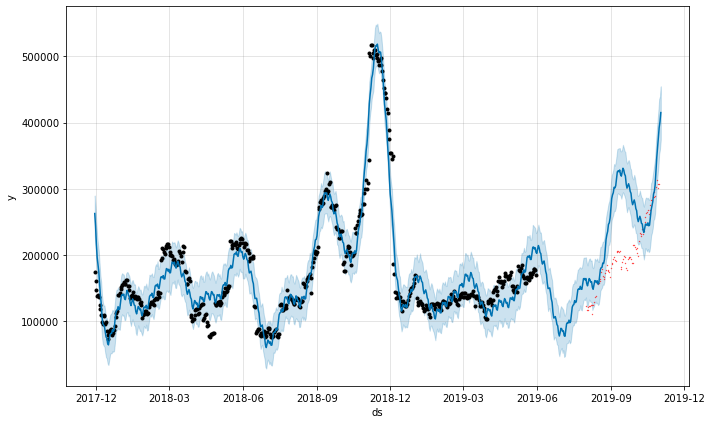

In [78]:
# 表示
future = model.make_future_dataframe(periods=155)
forecast = model.predict(future)
model.plot(forecast)
# 実際の値を赤点でプロット
plt.scatter(dates_production, y_production, s=0.1, c="red")
plt.show()

#### tpot（ランダムフォレスト, 勾配ブースティング）

In [91]:
from tpot import TPOTRegressor

In [92]:
# tpot で最適化
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(df_features, y)

Version 0.11.5 of tpot is outdated. Version 0.11.6 was released 6 days ago.



Generation 1 - Current best internal CV score: -5449051358.122638
Generation 2 - Current best internal CV score: -5449051358.122638
Generation 3 - Current best internal CV score: -5407905578.661844
Generation 4 - Current best internal CV score: -5407905578.661844
Generation 5 - Current best internal CV score: -5388675981.879474
Best pipeline: AdaBoostRegressor(SelectFwe(input_matrix, alpha=0.026000000000000002), learning_rate=0.01, loss=square, n_estimators=100)


TPOTRegressor(generations=5,
              log_file=<ipykernel.iostream.OutStream object at 0x000001E7195E8550>,
              population_size=50, random_state=42, verbosity=2)

In [93]:
# 作成した pipeline
tpot.fitted_pipeline_

Pipeline(steps=[('selectfwe',
                 SelectFwe(alpha=0.026000000000000002,
                           score_func=<function f_regression at 0x000001E721BBD430>)),
                ('adaboostregressor',
                 AdaBoostRegressor(learning_rate=0.01, loss='square',
                                   n_estimators=100, random_state=42))])

In [94]:
# 予測
result_predict_tpot = tpot.predict(df_features_production)

In [95]:
# 予測結果をデータに加えて可視化
# 学習に使用した日付とその値
df_tmp = pd.DataFrame([dates, y]).T
# テストに使用した日付とその予測値
df_result_predict = pd.DataFrame([dates_production, result_predict_tpot]).T
# 線で表示するデータ群
df_line = pd.concat([df_tmp, df_result_predict]).rename(columns={0:"dates", 1:"y"})

In [96]:
df_line

,dates,y
0,2017-11-29,173960
1,2017-11-30,160737
2,2017-12-01,147795
3,2017-12-02,138632
4,2017-12-03,139305
...,...,...
87,2019-10-27,191618
88,2019-10-28,195408
89,2019-10-29,199472
90,2019-10-30,199472


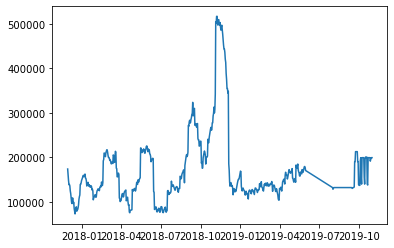

In [97]:
# 表示
plt.plot(df_line["dates"], df_line["y"])
plt.show()

In [ ]:
# 作成したモデルの書き出し
tpot.export('tpot_pipeline.py')

#### GPy（ガウス過程）

In [ ]:
import gpy

#### 状態空間モデル

### 3.Re-train your model on all of the data using the selected approach and prepare it for deployment.（選択したアプローチを使用して、すべてのデータでモデルを再トレーニングし、展開の準備をします。）

### 4.Articulate your findings in a summary report.（要約レポートで調査結果を明確にします。）